<table>
<tr>
    <td width=15%>
        <img src='https://drive.google.com/uc?id=1az52Yj43PD5kUsPHFKsiOzscMIX1GOew'>  
     </td>
  <td>
        <center>
            <h1> </h1>
            </br><h1>HPDA - Projet - Traitement d'images</h1>
            Nisrine FORTIN CAMDAVANT
            </br><h1><a style="font-size: 100pt; font-weight: bold">Deep learning et le blocked compressive sensing</a></h1><br/>
           </center>
  </td>
</tr>
</table>


##1.  Motivations
<font size="2pt">Dans ce travail, nous nous proposons d'utiliser un réseau de neurones profond pour reconstruire une image à $X$ partir des vecteurs  mesurés $y_i,~i=1,\ldots,\ell$ des patchs vectorisés $x_i,~~i=1,\ldots,\ell$ de l'image où $y_i\in\mathbb{R}^M$, $x_i\in\mathbb{R}^{B^2}$ et $M<<B^2$.
>
><font size="2pt">$\bullet$   Chaque image est découpée en blocs de taille $B\times B$ et chaque bloc est transformé en un vecteur colonne de taille $B^2$. On obtient alors une liste de vecteurs colonnes $x_i$ représentatnt l'image.
>
><font size="2pt">$\bullet$   A travers une matrice de mesure $\Phi\in\mathcal{M}_{MB^2}(\mathbb{R})$, nous permettant de capturer un ratio $R$ de la totatlité des pixels du bloc, on obtient pour chaque bloc vectorisé $x_i$ un vecteur
$$y_i=\Phi x_i.$$
>
><font size="2pt">$\bullet$  On entraine un modèle séquentiel avec deux couches cachées permettant la reconstruction d'une image à partir de ses vecteurs mesurés.


<font size="2pt"> Dans cette approche, les deux couches cachées effectuent l'étape de reconstruction. Cette dernière sera non linéaire et permet, à partir des vecteurs $y_i$, de reconstruire $x_i$.

##2.  Le travail à faire


1.  <font size="2pt"> **Dataset**

 <font size="2pt"> 1.1 Lecture des images à partir du répectoire .zip

 <font size="2pt"> 1.2 Création d'une liste des images sous Type=unit8

 <font size="2pt">1.3 Chargement de l'image de test

2.   <font size="2pt"> **Fonctions pour transformer les images**

 <font size="2pt"> 2.1 La fonction image_to_vectors qui récupère une image, la divise en blocs de BxB, les vectorise puis enregistre chaque bloc vectorisé dans une ligne d'un tableau

 <font size="2pt">2.2 La fonction vectors_to_image qui récupère une liste de blocs vectorisés et permet de reconstruire une image

 <font size="2pt">2.3 La fonction input_images_to_vectors qui s'appuie sur la fonction image_to_vectors pour traiter l'ensemble des images d'entrainement
  
 <font size="2pt">2.4 La fonction output_vectors_to_images qui s'appuie sur la fonction vectors_to_image pour traiter l'ensemble des images vectorisées

3.   <font size="2pt">**Splitting Data**

 <font size="2pt">3.1 Ensemble d'entrainement et de test
  
 <font size="2pt">3.2 Préparation des données pour l'apprentissage (cible et features)

4. <font size="2pt">**Mesures - La compression aléatoire avec un ratio R**

 <font size="2pt">4.1 Génération d'une matrice aléatoire $\Phi$

  <font size="2pt">4.2 Génération des vecteurs mesurés

5. <font size="2pt">**Building the Model**

 <font size="2pt">5.1 Des couches cachées

 <font size="2pt">5.2 L'optimiseur et la fonction coût

 <font size="2pt">5.3 Callbacks

6.  <font size="2pt">**Entrainement du modèle**

7. <font size="2pt">**Graphique de l'évolution du PSNR et de la LOSS**

 <font size="2pt"> 7.1 Le graphique de l'évolution de la fonction Loss

 <font size="2pt">7.2 Le graphique de l'évolution du PSNR

8. <font size="2pt">**Prédiction**

9. <font size="2pt">**Reconstruction des images prédites**

 <font size="2pt"> 9.1 Reconstruction des images de l'ensemble d'entrainement et de l'ensemble test

 <font size="2pt">9.2 ploting des images

8. <font size="2pt">**Comparaison du BCS-SPL et BCS-DL**

# Importation des librairies

In [3]:
import numpy as np
import math
import cv2

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as matp

import scipy.ndimage
from scipy import misc

import os
import random
import time


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/scratch/10578081/ipykernel_221817/2513471264.py:10: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy import misc


<font size="2pt">  On choisit d'utiliser des librairies et des pacakges facilitant la manipuation des images, l'apprentissage et la configuraion des couches.


 <font size="2pt">   **TensorFlow** : librairie dédiée au calcul numérique, au deep learning et l'analyse prédictive, ...

 <font size="2pt"> **keras** : librairie permettant de créer des couches pour les réseaux de neurones et de mettre en place des architectures complexes. La librairie permet de développer des **modèles séquentiels**. (des modèles qu'on configure couche par couche).

 <font size="2pt"> **sklearn** : package fournissant des fonctions pour diviser les données en ensembles d'entrainement et de test, pour évaluer les modèles de machine learning et pour effectuer une validation croisée...





In [2]:
#Import des librairies
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

2025-02-14 14:19:58.048895: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-14 14:19:58.050678: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-14 14:19:58.054403: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-14 14:19:58.064452: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739539198.080870  214117 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739539198.08

#Les hyper paramètres

<font size="2pt"> Dans la suite de travail, on fixe la taille des blocs et le ratio des mesures.

In [3]:
#Taille des blocs : BxB
B = 11
#Ratio de mesure : R = M/B^2
R = 0.2
#Le nombre de mesures
M = int(np.floor(B**2*R))
#Facteur de redondance
T = 8

# 1. Dataset

<font size="2pt"> Le dataset est constitué de 100 images de taille (297, 528). Elles sont répertoriées dans le fichier *Data.zip*

#### 1.1 Lecture des images à partir du répectoire .zip



#Décompression de l'archive Data.zip
import zipfile
im_zip = zipfile.ZipFile('Data.zip', 'r')
im_zip.extractall('input_data')
im_zip.close()

#### 1.2 Création d'une liste des images sous Type=unit8

In [4]:
def images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        imagePath = os.path.join(folder,filename)
        img = cv2.imread(imagePath,cv2.IMREAD_UNCHANGED)
        images.append(img[:,:,0])
    return images

In [5]:
images = images_from_folder('input_data/Data')

<font size="2pt">

1.   <font size="2pt"> Afficher les premières images
2.   <font size="2pt"> Vérifier que la liste *images* contient bien 100 images.



Number of images: 100


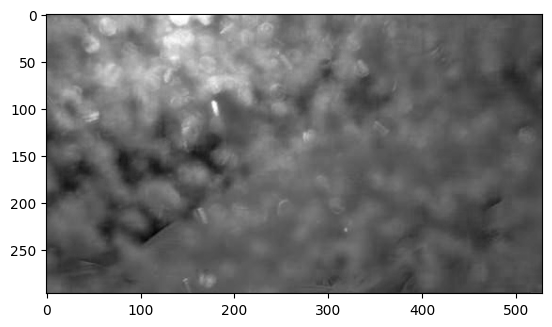

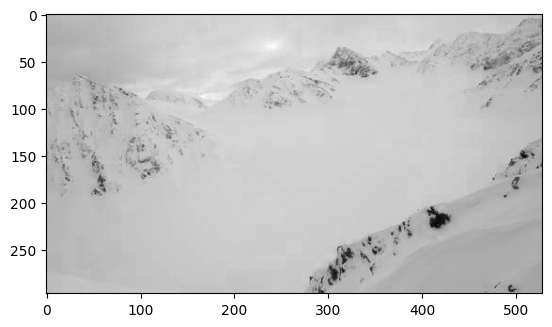

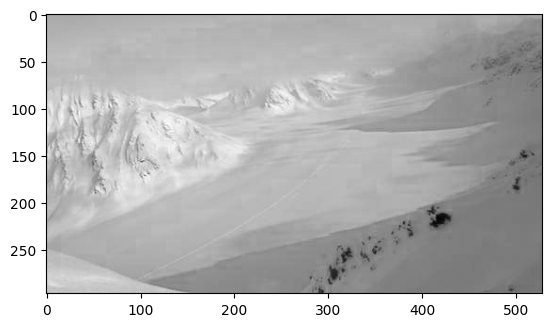

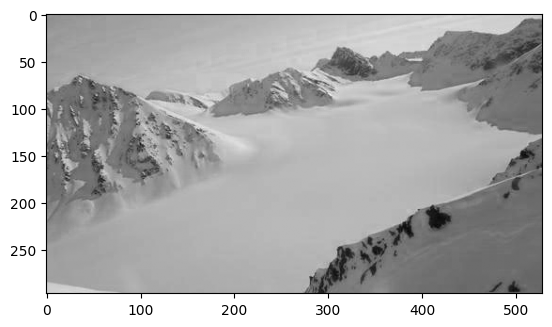

In [6]:
print(f"Number of images: {len(images)}")
for index_image in range(0, 4):
    plt.imshow(images[index_image], cmap="gray")
    plt.show()

### 1.3 Chargement de l'image de test

<font size="2pt"> Afin de tester notre modèle de reconstruction, nous allons utiliser une nouvelle image du glacier pour le test. **Cette dernière ne contribue pas à l'entrainement du modèle.**

In [7]:
imagetest=cv2.imread("2010042708_cam01p.jpg",0)

In [8]:
imgshape=imagetest.shape

<font size="2pt"> Afficher l'image de test.

# 2. Fonctions pour transformer les images

#### 2.1 La fonction image_to_vectors

<font size="2pt"> On écrit une fonction permettant de diviser une image en blocs de taille BXB. Chaque bloc est transformé en vecteur colonne de taille $B^2$. La fonction renvoie une liste de vecteurs colonnes.

In [9]:
#B : la taille du bloc BxB
def image_to_vectors(image,B):

    R,C = image.shape # shape de l'image
    res = [] # liste de vectors
    for r in range(0,R-B+1,B): # Parcours de l'image par blocs de taille BxB
        for c in range(0,C-B+1,B):
            tmp = image[r:B+r,c:c+B].flatten() # Extraction d'un bloc et aplatissement en vecteur
            res.append(tmp) # Ajout du vecteur dans la list

    return np.asarray(res)

<font size="2pt">1. Commenter le codes ci-dessus.

<font size="2pt">2. Transformer l'image de test imagetest en liste de blocs vectorisés.

In [10]:
vector_imagetest = image_to_vectors(imagetest, B)

#### 2.2 La fonction vectors_to_image


<font size="2pt"> On écrit une fonction permettant de construire une image à partir d'une liste de blocs vectorisés.

In [11]:
#liste = liste des vecteurs colonnes (les blocs vectorisés et mis en array)
#img_shape = la taille de l'image attendue
def vectors_to_image(liste,B,img_shape):
    numBlocks_R = int(img_shape[0]/B)
    numBlocks_C = int(img_shape[1]/B)
    newImage=np.empty((img_shape[0],img_shape[1]))
    for r in range(numBlocks_R):
        for c in range(numBlocks_C):
            if liste.size != 0:
                tmp = liste[0].reshape((B,B))
                liste = np.delete(liste,0,0)
                newImage[r*B:(r+1)*B , c*B:(c+1)*B] = tmp

    return newImage

<font size="2pt"> Tester la fonction vectors_to_image.

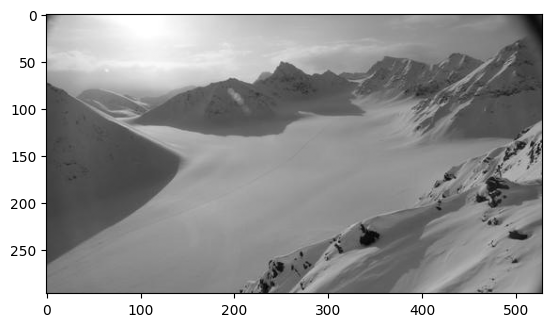

In [12]:
new_imagetest = vectors_to_image(vector_imagetest, B, imgshape)
plt.imshow(new_imagetest, cmap="gray")
plt.show()

#### 2.3 La fonction input_images_to_vectors

<font size="2pt"> On écrit une fonction permettant de transformer la liste des images d'entrainement en une liste de listes de vecteurs.

In [13]:
from numpy import uint8

# images = la liste de toutes les images de l'entrainement, ici on a 100 images
def input_images_to_vectors(images,B):
    input_X = []
    for i in images:
        input_X.extend(image_to_vectors(i,B))
    return np.asarray(input_X, dtype=uint8)

<font size="2pt"> Déterminer ***All_vectors*** la liste de toutes les images transformées en liste de vecteurs.

In [14]:
All_vectors = input_images_to_vectors(images,B)

### 2.4 La fonction output_vectors_to_images

<font size="2pt"> On écrit une fonction permettant de transformer la liste des listes des vecteurs en une liste d'images.

In [15]:
def output_vectors_to_images(listvectors,img_shape,B):
    imgL = int(img_shape[0]*img_shape[1]/(B*B))
    out_put = []
    for i in range(0,len(listvectors),imgL):
        out_put.append(vectors_to_image(listvectors[i:i+imgL],B,img_shape))
    return out_put

<font size="2pt">Tester cette fonction.

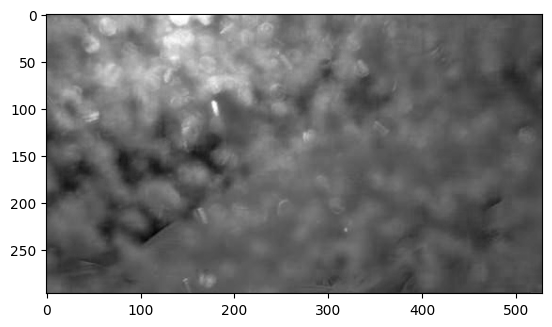

In [16]:
All_images = output_vectors_to_images(All_vectors, imgshape,B)
plt.imshow(All_images[0], cmap="gray")
plt.show()

# 3. Mesures - La compression aléatoire avec un ratio R

<font size="2pt"> On utilisera la matrice $\Phi$ générée selon la loi normale pour construire des vecteurs mesurés $y_i$ à partir des blocs vectorisés $x_i$
$$y_i=\Phi x_i$$

#### Génération d'une matrice aléatoire $\Phi$

In [17]:
def phi(M,N):
    p = 1/np.sqrt(M)
    res = np.zeros((M,N))
    res =  np.random.normal(0,p,M*N).reshape(M,N)
    #res = np.random.uniform(-p,p,M*N).reshape(M,N)
    return(res)

<font size="2pt"> Construire la matrice $\Phi$.

In [18]:
N = B**2
Phi =  phi(M, N)##compléter Matrice de mesures

# 4. Splitting Data

#### 4.1 Ensemble d'entrainement et de test

<font size="2pt">On divise notre liste d'images (images) en deux sous-ensembles : un ensemble d'entrainement et un ensemble de test.

In [19]:
# Sépare le dataset en 2 dataset avec un ratio 70/30.
XX_train, XX_test, yy_train, yy_test = train_test_split(images,images, test_size=0.30, random_state=42)

<font size="2pt"> Commenter ce que fait cette fonction avec ses paramètres d'entrée.

In [20]:
print("Nombre d'images dans le Training set: ",len(XX_train))
print("Nombre d'images dans le Test set: ",len(XX_test))

Nombre d'images dans le Training set:  70
Nombre d'images dans le Test set:  30


#### 4.2 Préparation des données pour l'apprentissage (cible)

<font size="2pt"> A partir de l'ensemble d'entrainement et de test, on construit une liste de listes de vecteurs (la cible).

In [21]:
#Train
X_train = input_images_to_vectors(XX_train, B)
#Test
X_test = input_images_to_vectors(XX_test, B)

In [22]:
print("Nombre de blocs du Training set: ",len(X_train))
print("Nombre de blocs du Test set: ",len(X_test))

Nombre de blocs du Training set:  90720
Nombre de blocs du Test set:  38880


#### 4.3 Génération des vecteurs mesurés (features)

<font size ="2pt"> A partir des vecteurs $x_i$, on consruit les vecteurs mesurés $y_i$ (on construit alors les features de notre modèle)

In [23]:
#Déterminons les vecteurs y_i
#1. à partir de X_train
y_train = (Phi @ X_train.T).T
#2. à partir de X_test
y_test = (Phi @ X_test.T).T
#3. à partir de imagetest_to_vectors
y_imagetest = (Phi @ vector_imagetest.T).T
print(np.shape(y_imagetest)) # B * B * R

(1296, 24)


In [24]:
print("Nombre de blocs du Training set: ",len(y_train))
print("Nombre de blocs du Test set: ",len(y_test))
print("Nombre de blocs du l'image test : ",len(y_imagetest))

Nombre de blocs du Training set:  90720
Nombre de blocs du Test set:  38880
Nombre de blocs du l'image test :  1296


# 5. Building the Model

#### 5.1 Des couches cachées

In [25]:
def build_Model(B,T):
    ##Set random seeds
    np.random.seed(23)
    tf.random.set_seed(23)
    #Create a model
    model = keras.models.Sequential()

    #Add layers
    # First hidden layer
    model.add(
         keras.layers.Dense(
                            units = B*B*T,
                            input_dim = int(B*B*R),
                            kernel_initializer = 'glorot_uniform',
                            bias_initializer='zeros',
                            activation = 'relu'))

    #Second Reconstruction Layer
    model.add(
         keras.layers.Dense(
                            units = B*B*T,
                            input_dim = B*B*T,
                            kernel_initializer = 'glorot_uniform',
                            bias_initializer='zeros',
                            activation = 'relu'))

    #Output Layer (pas de fonction d'activation spécifique ==> identité)
    model.add(
         keras.layers.Dense(
                            units = B*B,
                            input_dim = B*B*T,
                            kernel_initializer = 'glorot_uniform',
                            bias_initializer='zeros'))
    return model

In [26]:
model = build_Model(B,T)

/mnt/netapp2/Store_uni/home/ulc/cursos/curso341/mypython/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1739539206.804493  214117 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [27]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 968)            │        24,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 968)            │       937,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 121)            │       117,249 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,079,441 (4.12 MB)

 Trainable params: 1,079,441 (4.12 MB)

 Non-trainable params: 0 (0.00 B)

None


#### 5.2 L'optimiseur et la fonction coût

In [28]:
def PSNR(x_true, x_pred):

    # x_true to float32 avant de faire les calculs
    x_true = tf.cast(x_true, tf.float32)
    max_I = 255.0
    mse = tf.reduce_mean(tf.square(x_pred - x_true))
    # pour éviter un message inf si division par 0
    psnr_value = tf.where(tf.equal(mse, 0), 100.0, 10.0 * tf.math.log((max_I ** 2) / mse) / tf.math.log(10.0))

    return psnr_value

In [29]:
RMSprop_optimizer = keras.optimizers.RMSprop(
    learning_rate=0.0001,
    rho=0.9,
    momentum=0.0,
    # epsilon=None,
    #weight_decay=1e-7
    decay=1e-7
    )

/mnt/netapp2/Store_uni/home/ulc/cursos/curso341/mypython/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


### 5.3 Callbacks

In [30]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.PSNR = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.PSNR.append(logs.get('PSNR'))

In [31]:
loss_history = LossHistory()

# 6. Entrainement du modèle

<font size ='2pt'>La cible = images d'origine transformées en liste de blocs vectorisés (ici X_train)

<font size ='2pt'>Les features = les vecteurs mesurés (ici y_train)

In [32]:
model.compile(optimizer=RMSprop_optimizer, loss='mean_squared_error', metrics=[PSNR])

In [33]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [34]:
##entrainement
start = time.time()
history = model.fit(y_train, X_train,
                    batch_size=64, epochs =50,
                    verbose = 1,
                    validation_data=(y_test, X_test ),
                    callbacks=[loss_history])
end = time.time()
print("Execution time {0} s".format(end-start))

Epoch 1/50
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 616.7761 - psnr: 27.7537 - val_loss: 47.3343 - val_psnr: 32.1352
Epoch 2/50
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 47.8513 - psnr: 31.4695 - val_loss: 35.1949 - val_psnr: 33.7178
Epoch 3/50
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 39.0039 - psnr: 32.3601 - val_loss: 28.5287 - val_psnr: 35.0962
Epoch 4/50
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 34.7643 - psnr: 32.8919 - val_loss: 27.4693 - val_psnr: 35.2228
Epoch 5/50
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 32.0851 - psnr: 33.2457 - val_loss: 25.8928 - val_psnr: 35.5527
Epoch 6/50
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 30.0565 - psnr: 33.5342 - val_loss: 24.4748 - val_psnr: 35.9018
Epoch 7/50
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 28.4705 - psnr: 33.7701 - val_loss: 23.4236 - val_psnr: 36.1530
Epoch 8/50
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 27.1965 - psnr: 33.9694 - val_loss: 22.8595 - val_psnr:

# 7. Graphique de l'évolution du PSNR et de la LOSS

#### 7.1 Le graphique de l'évolution de la fonction Loss

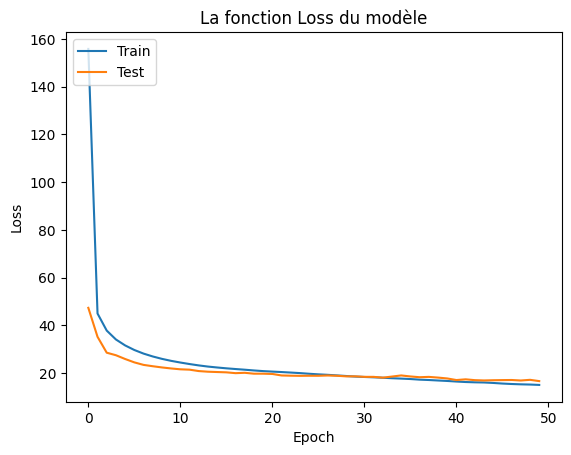

In [35]:
#plotting Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('La fonction Loss du modèle')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### 7.2 Le graphique de l'évolution du PSNR

In [36]:
loss, PSNR, val_loss, val_PSNR = history.history.keys()

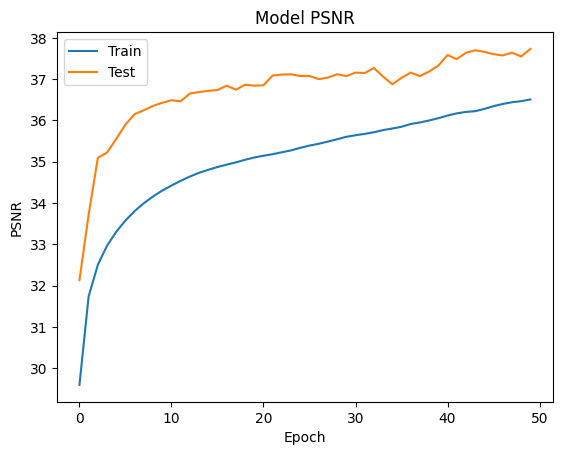

In [37]:
history.history.keys()
#plotting PSNR
plt.plot(history.history[PSNR])
plt.plot(history.history[val_PSNR])
plt.title('Model PSNR')
plt.ylabel('PSNR')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 8. Prédictions

In [38]:
x_train_pred = model.predict(y_train)
x_test_pred = model.predict(y_test)

2835/2835 ━━━━━━━━━━━━━━━━━━━━ 3s 938us/step
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


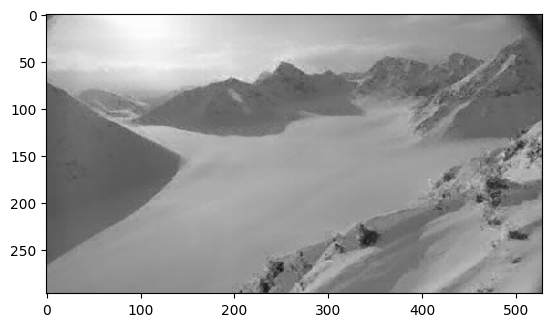

In [39]:
x_train_prednew = model.predict(y_imagetest)
reconstruct_x_train_prednew = output_vectors_to_images(x_train_prednew, imgshape,B)[0]
plt.imshow(reconstruct_x_train_prednew, cmap="gray")
plt.show()

<font size ='2pt'> Reconstruire l'image de test (celle qui n'a pas contribué à la construction du modèle).

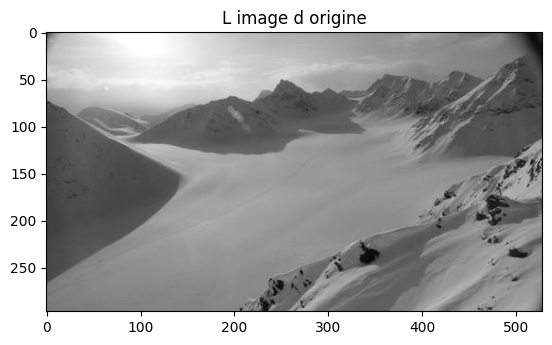

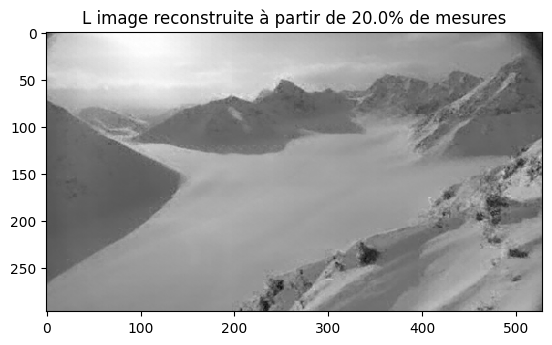

In [40]:
plt.imshow(imagetest,cmap='gray')
plt.title('L image d origine')
plt.show()
plt.imshow(reconstruct_x_train_prednew,cmap='gray')
plt.title(f'L image reconstruite à partir de {R*100}% de mesures')
plt.show()

# 9. Reconstrcution des images prédites

#### 9.1 Reconstruction des images de l'ensemble d'entrainement et de l'ensemble test

In [41]:
#reconstructing training predictions
##compléter
reconstruct_test = output_vectors_to_images(x_test_pred, imgshape,B)

#reconstructing test predictions
##compléter
reconstruct_train = output_vectors_to_images(x_train_pred, imgshape,B)

#### 9.2 Plotting des images

<font size ='2pt'> Représenter quelques images d'origine et leur prédiction par le modèle.

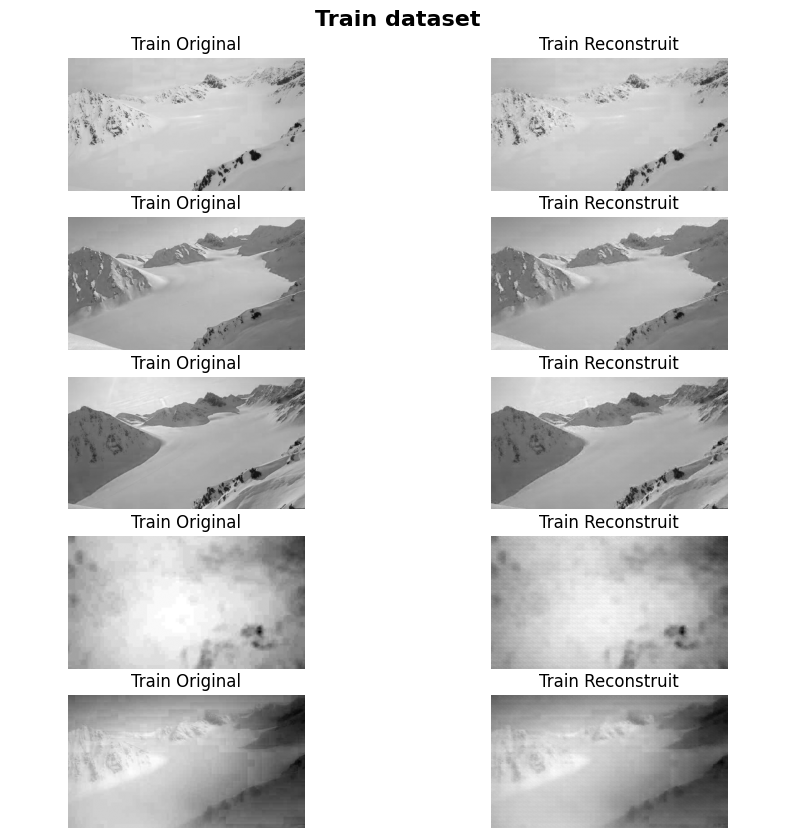

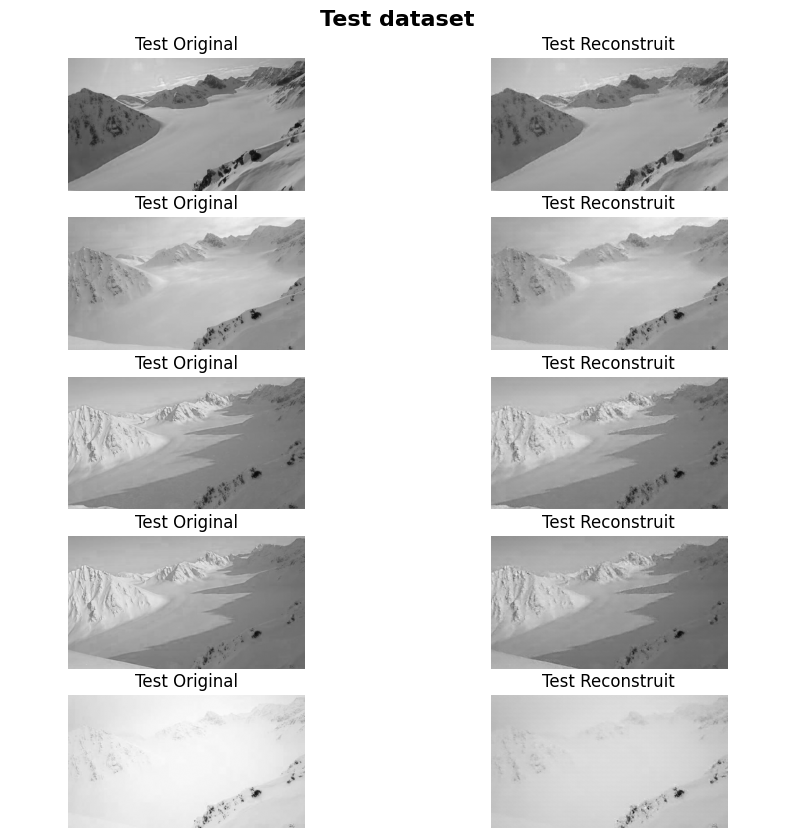

In [42]:
import matplotlib.pyplot as plt

def afficher_images(original_data, reconstructed_data, n, dataset_name):
    """
    Affiche les images originales et reconstruites dans une grille sans axes.

    Args:
        original_data: Les données originales à afficher.
        reconstructed_data: Les données reconstruites à afficher.
        n: Nombre d'images à afficher.
        dataset_name: Le nom du jeu de données (par exemple 'Train' ou 'Test').
    """
    plt.figure(figsize=(10, 2 * n))

    # Affichage du titre du jeu de données
    plt.text(0.5, 1.05, f"{dataset_name} dataset", ha='center', va='center', fontsize=16, fontweight='bold', transform=plt.gca().transAxes)
    plt.axis('off')

    for i in range(n):
        # Affichage des images originales (gauche)
        ax1 = plt.subplot(n, 2, 2 * i + 1)
        plt.imshow(original_data[i], cmap='gray')
        plt.title(f"{dataset_name} Original")
        ax1.axis("off")  # Désactive les axes pour l'image originale

        # Affichage des images reconstruites (droite)
        ax2 = plt.subplot(n, 2, 2 * i + 2)
        plt.imshow(reconstructed_data[i], cmap='gray')
        plt.title(f"{dataset_name} Reconstruit")
        ax2.axis("off")  # Désactive les axes pour l'image reconstruite

    plt.show()

# Nombre d'images à afficher
n = 5

# Affichage pour le jeu de données "Train"
afficher_images(XX_train, reconstruct_train, n, "Train")

# Affichage pour le jeu de données "Test"
afficher_images(XX_test, reconstruct_test, n, "Test")

#10. Entrainement d'autres modèles

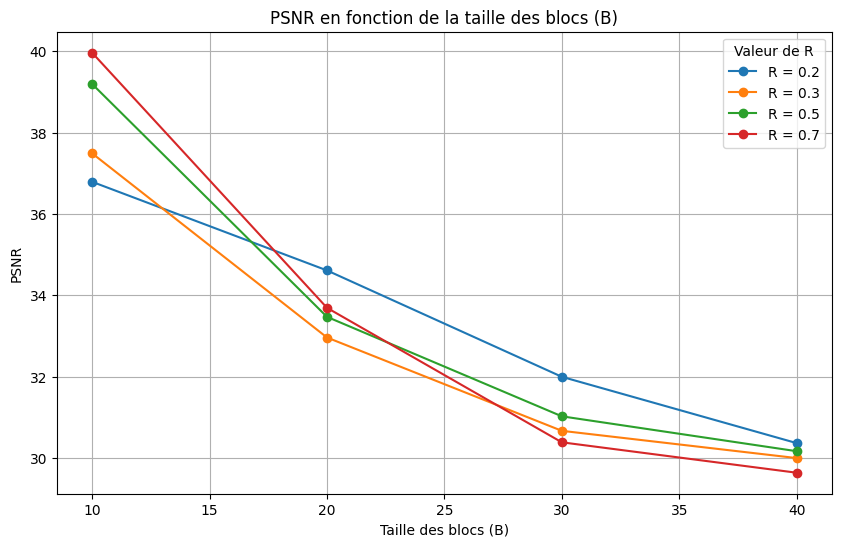

In [1]:
import json
import matplotlib.pyplot as plt
def load_results(results_path="results/all_results.json"):
    """
    Charge les résultats depuis le fichier JSON.
    
    Paramètres :
    - results_path : Le chemin du fichier JSON contenant les résultats
    
    Retourne :
    - Les résultats chargés sous forme de liste de dictionnaires
    """
    with open(results_path, "r") as json_file:
        try:
            all_results = json.load(json_file)
        except json.JSONDecodeError:
            all_results = []
    return all_results

def plot_psnr_vs_b(results):
    """
    Affiche un graphique PSNR vs B avec des formes différentes pour chaque valeur de R.
    
    Paramètres :
    - results : Liste de résultats avec des valeurs pour R, B et PSNR
    """
    # Dictionnaire pour organiser les résultats par R
    results_by_R = {}
    
    for result in results:
        R = result["R"]
        B = result["B"]
        psnr = result["PSNR"]
        
        if R not in results_by_R:
            results_by_R[R] = {"B": [], "PSNR": []}
        
        results_by_R[R]["B"].append(B)
        results_by_R[R]["PSNR"].append(psnr)
    
    # Définir les formes pour chaque valeur de R
    markers = {'R1': 'o', 'R2': '^', 'R3': 's', 'R4': 'D'}  # Vous pouvez ajuster ces valeurs selon vos besoins
    
    # Tracer le graphique
    plt.figure(figsize=(10, 6))
    
    for R, data in results_by_R.items():
        plt.plot(data["B"], data["PSNR"], label=f"R = {R}", marker=markers.get(f"R{R}", 'o'))
    
    # Ajouter des étiquettes et un titre
    plt.xlabel("Taille des blocs (B)")
    plt.ylabel("PSNR")
    plt.title("PSNR en fonction de la taille des blocs (B)")
    plt.legend(title="Valeur de R")
    plt.grid(True)
    plt.show()

# Charger les résultats
results = load_results()

# Afficher le graphique
plot_psnr_vs_b(results)

#10.  Comparaison du BCS-SPL et BCS-DL

<font size ='2pt'> Commenter les résultats et faite une comparaison critiques des deux approches.